In [10]:
import keras 
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

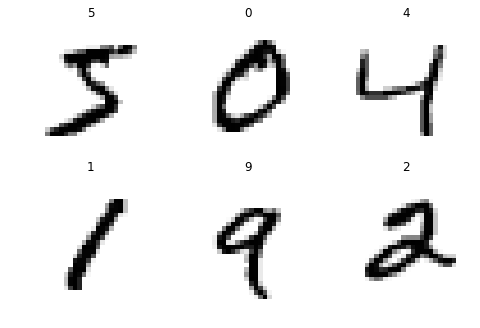

In [8]:
plt.figure(figsize=(8, 8))

for i in range(0, 6):
    plt.subplot(330 + 1 + i)
    plt.title(y_train[i])
    plt.axis('off')
    plt.imshow(x_train[i], cmap='binary')
plt.show()

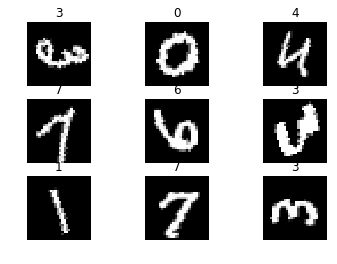

In [12]:
# 随机旋转
from keras.preprocessing.image import ImageDataGenerator

(x_train,y_train),(x_test,y_test)=mnist.load_data()


x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_train=x_train.astype('float32')
x_test = x_test.astype('float32')

datagen = ImageDataGenerator(rotation_range=90) #最多翻转90°

datagen.fit(x_train)

for x_batch , y_batch in datagen.flow(x_train,y_train,batch_size=9):

    for i in range(9):
        plt.subplot(330+i+1)
        plt.title(y_batch[i])
        plt.axis('off')
        plt.imshow(x_batch[i].reshape(28,28),cmap=plt.get_cmap('gray'))
    plt.show()
    break

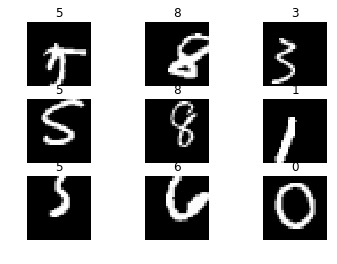

In [13]:
#随机偏移
(x_train,y_train),(x_test,y_test)=mnist.load_data()


x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_train=x_train.astype('float32')
x_test = x_test.astype('float32')

shift=0.2  #偏移程度
datagen = ImageDataGenerator(width_shift_range=shift,height_shift_range=shift) #最多翻转90°

datagen.fit(x_train)

for x_batch , y_batch in datagen.flow(x_train,y_train,batch_size=9):

    for i in range(9):
        plt.subplot(330+i+1)
        plt.title(y_batch[i])
        plt.axis('off')
        plt.imshow(x_batch[i].reshape(28,28),cmap=plt.get_cmap('gray'))
    plt.show()
    break

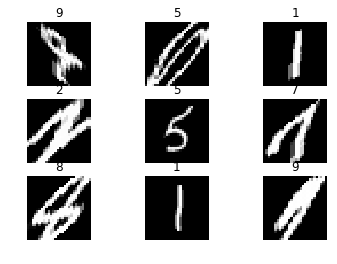

In [14]:
#随机推移错切， 中心垂直轴不变动

(x_train,y_train),(x_test,y_test)=mnist.load_data()


x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_train=x_train.astype('float32')
x_test = x_test.astype('float32')

shear_range=1.25 #推移错切的强度
datagen = ImageDataGenerator(shear_range=shear_range) #最多翻转90°

datagen.fit(x_train)

for x_batch , y_batch in datagen.flow(x_train,y_train,batch_size=9):

    for i in range(9):
        plt.subplot(330+i+1)
        plt.title(y_batch[i])
        plt.axis('off')
        plt.imshow(x_batch[i].reshape(28,28),cmap=plt.get_cmap('gray'))
    plt.show()
    break

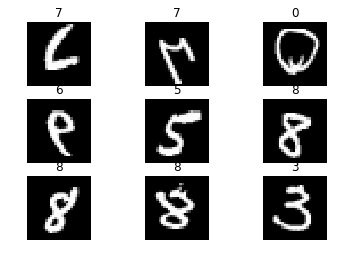

In [15]:
#随机镜像翻转

(x_train,y_train),(x_test,y_test)=mnist.load_data()


x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_train=x_train.astype('float32')
x_test = x_test.astype('float32')

datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True) 

datagen.fit(x_train)

for x_batch , y_batch in datagen.flow(x_train,y_train,batch_size=9):

    for i in range(9):
        plt.subplot(330+i+1)
        plt.title(y_batch[i])
        plt.axis('off')
        plt.imshow(x_batch[i].reshape(28,28),cmap=plt.get_cmap('gray'))
    plt.show()
    break

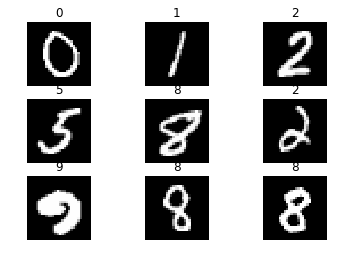

In [16]:
#对每个像素值进行标准化 mean=0,std=1

(x_train,y_train),(x_test,y_test)=mnist.load_data()


x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_train=x_train.astype('float32')
x_test = x_test.astype('float32')

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True) 

datagen.fit(x_train)

for x_batch , y_batch in datagen.flow(x_train,y_train,batch_size=9):

    for i in range(9):
        plt.subplot(330+i+1)
        plt.title(y_batch[i])
        plt.axis('off')
        plt.imshow(x_batch[i].reshape(28,28),cmap=plt.get_cmap('gray'))
    plt.show()
    break

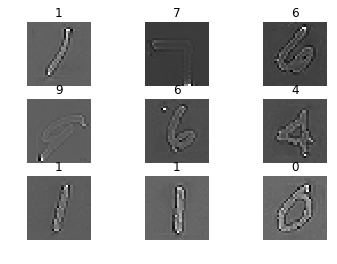

In [17]:
#zca白化转换更好的突出结构


(x_train,y_train),(x_test,y_test)=mnist.load_data()


x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_train=x_train.astype('float32')
x_test = x_test.astype('float32')


datagen = ImageDataGenerator(zca_whitening=True)

datagen.fit(x_train)

for x_batch , y_batch in datagen.flow(x_train,y_train,batch_size=9):

    for i in range(9):
        plt.subplot(330+i+1)
        plt.title(y_batch[i])
        plt.axis('off')
        plt.imshow(x_batch[i].reshape(28,28),cmap=plt.get_cmap('gray'))
    plt.show()
    break

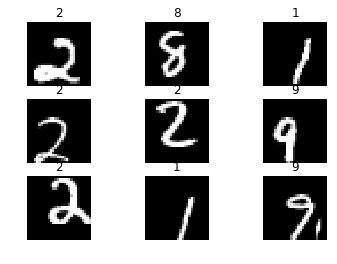

In [21]:
#存储增强的图像数据
import os
(x_train,y_train),(x_test,y_test)=mnist.load_data()


x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_train=x_train.astype('float32')
x_test = x_test.astype('float32')

shift=0.2  #偏移程度
datagen = ImageDataGenerator(width_shift_range=shift,height_shift_range=shift) 

datagen.fit(x_train)

if not os.path.exists('images'):
    os.makedirs('images')

for x_batch , y_batch in datagen.flow(x_train,y_train,batch_size=9,
                                     save_to_dir='images',save_prefix='aug',save_format='png'):

    for i in range(9):
        plt.subplot(330+i+1)
        plt.title(y_batch[i])
        plt.axis('off')
        plt.imshow(x_batch[i].reshape(28,28),cmap=plt.get_cmap('gray'))
    plt.show()
    break